# CRI MNIST Demonstration with snnTorch 

## Training SNN with snnTorch

In [ ]:
!pip install snntorch

In [7]:
# imports
import snntorch as snn
from snntorch import surrogate
from snntorch import backprop
from snntorch import functional as SF
from snntorch import utils
from snntorch import spikeplot as splt
from snntorch import spikegen
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.nn.parameter import Parameter
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import time

### Import MNIST datasets

In [8]:
# dataloader arguments
batch_size = 128
data_path='~/justinData/mnist'

dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [9]:
# Define a transform
transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(data_path, train=False, download=True, transform=transform)

In [10]:
# Create DataLoaders
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=True)

### Define the network

In [11]:
# Network Architecture
num_inputs = 28*28
num_hidden_0 = 2500
num_hidden_1 = 2000
num_hidden_2 = 1500
num_hidden_3 = 1000
num_hidden_4 = 500
num_hidden = 1000
num_outputs = 10

# Temporal Dynamics
num_steps = 25
beta = 1.0
spike_grad = surrogate.fast_sigmoid(slope=25)

In [12]:
net2 = nn.Sequential(nn.Linear(num_inputs, num_hidden, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden, num_outputs, bias=True),
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True, output=True)).to(device)
            

In [13]:
net6 = nn.Sequential(nn.Linear(num_inputs, num_hidden_0, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_0, num_hidden_1, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_1, num_hidden_2, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_2, num_hidden_3, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_3, num_hidden_4, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_4, num_outputs, bias=True),
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True, output=True)).to(device)

In [8]:
num_hidden_0 = 3000
num_hidden_1 = 2800
num_hidden_2 = 2600
num_hidden_3 = 2400
num_hidden_4 = 2200
num_hidden_5 = 1800
num_hidden_6 = 1600
num_hidden_7 = 1400
num_hidden_8 = 1200
num_hidden_9 = 1000
num_hidden_10 = 800
num_hidden_11 = 400

In [9]:
net12 = nn.Sequential(nn.Linear(num_inputs, num_hidden_0, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_0, num_hidden_1, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_1, num_hidden_2, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_2, num_hidden_3, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_3, num_hidden_4, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_4, num_hidden_5, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_5, num_hidden_6, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_6, num_hidden_7, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_7, num_hidden_8, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_8, num_hidden_9, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_9, num_hidden_10, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_10, num_hidden_11, bias=True), 
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True),
                    nn.Linear(num_hidden_11, num_outputs, bias=True),
                    snn.Leaky(beta=beta, spike_grad=spike_grad,init_hidden=True, output=True)).to(device)

In [7]:
data, targets = next(iter(train_loader))
data = data.to(device)
targets = targets.to(device)

In [14]:
def forward_pass(net, num_steps, data, batch_size):
    mem_rec = []
    spk_rec = []
    utils.reset(net)  # resets hidden states for all LIF neurons in net

    for step in range(num_steps):
        spk_out, mem_out = net(data.view(batch_size, -1))
        spk_rec.append(spk_out)
        mem_rec.append(mem_out)
  
    return torch.stack(spk_rec), torch.stack(mem_rec)

In [9]:
spk_rec, mem_rec = forward_pass(net2, num_steps, data, batch_size)

### Loss Functions

In [15]:
loss_fn = SF.ce_count_loss()

In [16]:
loss_val = loss_fn(spk_rec, targets)

print(f"The loss from an untrained network is {loss_val.item():.3f}")

NameError: name 'spk_rec' is not defined

### Accuracy 

In [12]:
acc = SF.accuracy_rate(spk_rec, targets)

print(f"The accuracy of a single batch using an untrained network is {acc*100:.3f}%")

The accuracy of a single batch using an untrained network is 7.031%


In [17]:
def batch_accuracy(train_loader, net, num_steps, batch_size):
    with torch.no_grad():
        total = 0
        acc = 0
        net.eval()

        train_loader = iter(train_loader)
        for data, targets in train_loader:
            data = data.to(device)
            targets = targets.to(device)
            spk_rec, _ = forward_pass(net, num_steps, data, batch_size)

            acc += SF.accuracy_rate(spk_rec, targets) * spk_rec.size(1)
            total += spk_rec.size(1)

    return acc/total

### Training

In [51]:
optimizer = torch.optim.Adam(net6.parameters(), lr=1e-9, betas=(0.9, 0.999))
num_epochs = 2
loss_hist = []
test_loss_hist = []
counter = 0

# Outer training loop
for epoch in range(num_epochs):
    iter_counter = 0
    train_batch = iter(train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        net6.train()
        spk_rec, mem_rec = forward_pass(net6, num_steps, data, batch_size)

        # initialize the loss & sum over time
        loss_val = torch.zeros((1), dtype=dtype, device=device)
        loss_val += loss_fn(spk_rec, targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        # Test set
        with torch.no_grad():
            net6.eval()
            test_data, test_targets = next(iter(test_loader))
            test_data = test_data.to(device)
            test_targets = test_targets.to(device)

            # Test set forward pass
            test_spk, test_mem = forward_pass(net6, num_steps, test_data,batch_size)

            # Test set loss
            test_loss = torch.zeros((1), dtype=dtype, device=device)
            test_loss += loss_fn(test_spk, test_targets)

            test_loss_hist.append(test_loss.item())

            # Print train/test loss/accuracy
            if counter % 50 == 0:
                    print(f"Epoch {epoch}, Iteration {iter_counter}")
                    print(f"Train Set Loss: {loss_hist[counter]:.2f}")
                    print(f"Test Set Loss: {test_loss_hist[counter]:.2f}")
                    train_acc = SF.accuracy_rate(spk_rec, targets)
                    test_acc = SF.accuracy_rate(test_spk, test_targets)
                    print(f"Train set accuracy for a single minibatch: {train_acc*100:.2f}%")
                    print(f"Test set accuracy for a single minibatch: {test_acc*100:.2f}%")
                    print("\n")
            counter += 1
            iter_counter +=1

Epoch 0, Iteration 0
Train Set Loss: 0.02
Test Set Loss: 0.02
Train set accuracy for a single minibatch: 99.22%
Test set accuracy for a single minibatch: 100.00%


Epoch 0, Iteration 50
Train Set Loss: 0.04
Test Set Loss: 0.03
Train set accuracy for a single minibatch: 98.44%
Test set accuracy for a single minibatch: 99.22%


Epoch 0, Iteration 100
Train Set Loss: 0.06
Test Set Loss: 0.11
Train set accuracy for a single minibatch: 98.44%
Test set accuracy for a single minibatch: 96.88%


Epoch 0, Iteration 150
Train Set Loss: 0.02
Test Set Loss: 0.04
Train set accuracy for a single minibatch: 99.22%
Test set accuracy for a single minibatch: 99.22%


Epoch 0, Iteration 200
Train Set Loss: 0.04
Test Set Loss: 0.04
Train set accuracy for a single minibatch: 98.44%
Test set accuracy for a single minibatch: 97.66%


Epoch 0, Iteration 250
Train Set Loss: 0.02
Test Set Loss: 0.03
Train set accuracy for a single minibatch: 98.44%
Test set accuracy for a single minibatch: 99.22%


Epoch 0, Ite

In [18]:
test_acc = batch_accuracy(test_loader, net6, num_steps, batch_size)

print(f"The total accuracy on the test set is: {test_acc * 100:.2f}%")

The total accuracy on the test set is: 9.80%


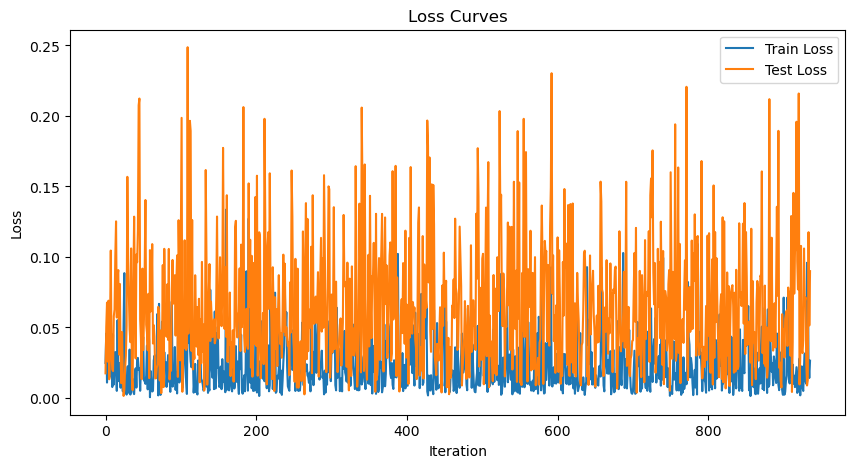

In [53]:
# Plot Loss
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(test_loss_hist)
plt.title("Loss Curves")
plt.legend(["Train Loss", "Test Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

### Save Models

In [19]:
def save_checkpoint(state, is_quan, fdir):
    filepath = os.path.join(fdir, 'checkpoint.pth')
    torch.save(state, filepath)
    if is_quan:
        shutil.copyfile(filepath, os.path.join(fdir, 'model_quantized_6L.pth.tar'))
    else:
        shutil.copyfile(filepath, os.path.join(fdir, 'model_snnTorch_6L.pth.tar'))

In [43]:
if not os.path.exists('result'):
    os.makedirs('result')
fdir = 'result/'
if not os.path.exists(fdir):
    os.makedirs(fdir)

In [44]:
save_checkpoint({'state_dict': net6.state_dict(),}, 0, fdir)

### Quantization

In [45]:
# def weight_quantization(b):

#     def uniform_quant(x, b):
#         xdiv = x.mul((2 ** b - 1))
#         xhard = xdiv.round().div(2 ** b - 1)
#         #print('uniform quant bit: ', b)
#         return xhard

#     class _pq(torch.autograd.Function):
#         @staticmethod
#         def forward(ctx, input, alpha):
#             input.div_(alpha)                          # weights are first divided by alpha
#             input_c = input.clamp(min=-1, max=1)       # then clipped to [-1,1]
#             sign = input_c.sign()
#             input_abs = input_c.abs()
#             input_q = uniform_quant(input_abs, b).mul(sign)
#             ctx.save_for_backward(input, input_q)
#             input_q = input_q.mul(alpha)               # rescale to the original range
#             return input_q

#         @staticmethod
#         def backward(ctx, grad_output):
#             grad_input = grad_output.clone()             # grad for weights will not be clipped
#             input, input_q = ctx.saved_tensors
#             i = (input.abs()>1.).float()     # >1 means clipped. # output matrix is a form of [True, False, True, ...]
#             sign = input.sign()              # output matrix is a form of [+1, -1, -1, +1, ...]
#             #grad_alpha = (grad_output*(sign*i + (input_q-input)*(1-i))).sum()
#             grad_alpha = (grad_output*(sign*i + (0.0)*(1-i))).sum()
#             # above line, if i = True,  and sign = +1, "grad_alpha = grad_output * 1"
#             #             if i = False, "grad_alpha = grad_output * (input_q-input)"
#             grad_input = grad_input*(1-i)
#             return grad_input, grad_alpha

#     return _pq().apply

# class weight_quantize_fn(nn.Module):
#     def __init__(self, w_bit):
#         super(weight_quantize_fn, self).__init__()
#         self.w_bit = w_bit-1
#         #self.wgt_alpha = wgt_alpha
#         self.weight_q = weight_quantization(b=self.w_bit)
#         #self.register_parameter('wgt_alpha', Parameter(torch.tensor(3.0)))
#     def forward(self, weight):
#         #mean = weight.data.mean()
#         #std = weight.data.std()
#         #weight = weight.add(-mean).div(std)      # weights normalization
#         weight_q = self.weight_q(weight, self.wgt_alpha)

        # return weight_q

In [47]:
# w_alpha=1
# w_bits=16
# weight_quant = weight_quantize_fn(w_bit= w_bits)  ## define quant function
# weight_quant.wgt_alpha = w_alpha
# fc1_quant      = weight_quant(net6[0].weight)
# w_delta        = w_alpha/(2**(w_bits-1)-1)
# fc1_int        = fc1_quant/w_delta
# print("FC1 Weights: \n",fc1_int)

FC1 Weights: 
 tensor([[ 767.0000,  311.0000, -783.0000,  ...,  347.0000,  377.0000,
         -136.0000],
        [  -0.0000,  887.0000,  166.0000,  ..., -706.0000,  650.0000,
          798.0000],
        [-163.0000,    0.0000, -722.0000,  ..., 1067.0000,  824.9999,
            0.0000],
        ...,
        [ 540.9999,  -51.0000, -500.0000,  ..., -392.0000,  -76.0000,
         -305.0000],
        [-748.9999, -474.0000,  140.0000,  ...,  357.0000, -702.0000,
         -540.0000],
        [  63.0000,  383.0000, -910.0000,  ...,  610.0000, 1080.0000,
           -0.0000]], device='cuda:0', grad_fn=<DivBackward0>)


In [48]:

for layer in net6:
        if isinstance(layer, torch.nn.Linear):
                layer.weight = Parameter(weight_quant(layer.weight))
                w_delta = w_alpha/(2**(w_bits-1)-1)
                layer.weight = Parameter(layer.weight/w_delta)
                layer.bias = Parameter(layer.bias/w_delta)
        if isinstance(layer, torch.nn.Conv2d):
                layer.weight = Parameter(weight_quant(layer.weight))
                w_delta = w_alpha/(2**(w_bits-1)-1)
                layer.weight = Parameter(layer.weight/w_delta)
                layer.bias = Parameter(layer.bias/w_delta)
        if isinstance(layer, snn.Leaky):
                layer.threshold = layer.threshold/w_delta

In [49]:
test_acc = batch_accuracy(test_loader, net6, num_steps, batch_size)

print(f"The total accuracy on the test set is: {test_acc * 100:.2f}%")

The total accuracy on the test set is: 98.13%


In [50]:
save_checkpoint({'state_dict': net6.state_dict(),}, 1, fdir)

### Load Saved Model

In [14]:
best_model_path = '/Volumes/export/isn/keli/Desktop/CRI/result/model_quantized.pth.tar'
checkpoint = torch.load(best_model_path)
net2.load_state_dict(checkpoint['state_dict'])
net2.eval()

Sequential(
  (0): Linear(in_features=784, out_features=1000, bias=True)
  (1): Leaky()
  (2): Linear(in_features=1000, out_features=10, bias=True)
  (3): Leaky()
)

In [15]:
test_acc = batch_accuracy(test_loader, net2, num_steps, batch_size)
print(f"The total accuracy on the test set is: {test_acc * 100:.2f}%")

The total accuracy on the test set is: 98.07%


### Mapping into CRI

In [16]:
for i, layer in enumerate(net2):
    if i % 2 == 0:
        print(layer.weight.shape)

torch.Size([1000, 784])
torch.Size([10, 1000])


In [17]:
# extract weights and bias for torchsnn
layers, biases = [], []
for i, layer in enumerate(net2):
    if i % 2 == 0:
        layers.append(layer.weight.detach().cpu().numpy())
        biases.append(layer.bias.detach().cpu().numpy())

print(np.min(layers[1]))
print(np.max(layers[1]))

-7424.0
5286.0


In [18]:
for layerNum, layer in enumerate(layers):
    print(layer.shape)
    print(biases[layerNum].shape)

(1000, 784)
(1000,)
(10, 1000)
(10,)


In [19]:
axonsDict = {}
neuronsDict = {}
outputs = []
bias_axon = {}

axonOffset = 0
currLayerNeuronIdxOffset = 0
nextLayerNeuronIdxOffset = 0
for layerNum, layer in enumerate(layers):
    inFeatures = layer.shape[1]
    outFeatures = layer.shape[0]
    shape = layer.shape
    weight = layer
    bias = biases[layerNum]
    print("Weights shape: ", np.shape(weight))
    if (layerNum == 0):
        print('constructing Axons')
        print("Input layer shape(outfeature, infeature): ", weight.shape)
        for axonIdx, axon in enumerate(weight.T):
            #print(axonIdx)
            axonID = 'a'+str(axonIdx)
            axonEntry = [(str(postSynapticID), int(synapseWeight)) for postSynapticID, synapseWeight in enumerate(axon) ]
            axonsDict[axonID] = axonEntry
        axonOffset += inFeatures
        print("axon offset: ",axonOffset)
        #implmenting bias: for each bias add a axon with corresponding weights with synapse (neuron, bias_val)
        print('Construct bias axons for first hidden layers:',bias.shape)
        for neuronIdx, bias_value in enumerate(bias):
            biasAxonID = 'a'+str(neuronIdx + axonOffset)
            biasAxonEntry = [(str(neuronIdx),int(bias_value))]
            axonsDict[biasAxonID] = biasAxonEntry
        print("number of axons: ", len(axonsDict))
        print("number of neurons: ", len(neuronsDict),"\n")
        
    elif (layerNum == len(layers)-1):
        print('constructing output layer')
        nextLayerNeuronIdxOffset += inFeatures
        print("output layer shape(outfeature, infeature): ", weight.shape)
        for baseNeuronIdx, neuron in enumerate(weight.T):
            neuronID = str(baseNeuronIdx+currLayerNeuronIdxOffset)
            neuronEntry = [(str(basePostSynapticID+nextLayerNeuronIdxOffset), int(synapseWeight)) for basePostSynapticID, synapseWeight in enumerate(neuron) if synapseWeight != 0]
            neuronsDict[neuronID] = neuronEntry
            #print(neuronID)
        currLayerNeuronIdxOffset += inFeatures
        #instantiate the output neurons
        print('instantiate output neurons')
        for baseNeuronIdx in range(outFeatures):
            neuronID = str(baseNeuronIdx+nextLayerNeuronIdxOffset)
            neuronsDict[neuronID] = []
            outputs.append(neuronID)
            #print(neuronID)
        #implmenting bias: for each bias add a axon with corresponding weights with synapse (neuron, bias_val)
        print('Construct bias axons for output neurons',bias.shape)
        axonOffset += inFeatures
        for neuronIdx, bias_value in enumerate(bias):
            biasAxonID = 'a'+str(neuronIdx + axonOffset)
            biasAxonEntry = [(str(neuronIdx+nextLayerNeuronIdxOffset),int(bias_value))]
            axonsDict[biasAxonID] = biasAxonEntry
        print("number of axons: ", len(axonsDict))
        print("number of neurons: ", len(neuronsDict),"\n")
            
    else:
        print('constructing hidden layer')
        nextLayerNeuronIdxOffset += inFeatures
        for baseNeuronIdx, neuron in enumerate(weight.T): #SHOULD THIS BE A TRANSPOSE
            neuronID = str(baseNeuronIdx+currLayerNeuronIdxOffset)
            neuronEntry = [(str(basePostSynapticID+nextLayerNeuronIdxOffset), int(synapseWeight)) for basePostSynapticID, synapseWeight in enumerate(neuron) if synapseWeight != 0 ]
            neuronsDict[neuronID] = neuronEntry
            #print(neuronID)
        currLayerNeuronIdxOffset += inFeatures
        axonOffset += inFeatures
        print("axon offset: ",axonOffset)
        #implmenting bias: for each bias add a axon with corresponding weights with synapse (neuron, bias_val)
        print('Construct bias axons for hidden layers:',bias.shape)
        for neuronIdx, bias_value in enumerate(bias):
            biasAxonID = 'a'+str(neuronIdx + axonOffset)
            biasAxonEntry = [(str(neuronIdx+nextLayerNeuronIdxOffset),int(bias_value))]
            axonsDict[biasAxonID] = biasAxonEntry
        print("number of axons: ", len(axonsDict))
        print("number of neurons: ", len(neuronsDict),"\n")
        
print("output neurons: ", outputs)
print("number of axons: ", len(axonsDict))
print("number of neurons: ", len(neuronsDict),"\n")

Weights shape:  (1000, 784)
constructing Axons
Input layer shape(outfeature, infeature):  (1000, 784)
axon offset:  784
Construct bias axons for first hidden layers: (1000,)
number of axons:  1784
number of neurons:  0 

Weights shape:  (10, 1000)
constructing output layer
output layer shape(outfeature, infeature):  (10, 1000)
instantiate output neurons
Construct bias axons for output neurons (10,)
number of axons:  1794
number of neurons:  1010 

output neurons:  ['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009']
number of axons:  1794
number of neurons:  1010 



In [20]:
print("Number of axons: ",len(axonsDict))
totalAxonSyn = 0
maxFan = 0
for key in axonsDict.keys():
    totalAxonSyn += len(axonsDict[key])
    if len(axonsDict[key]) > maxFan:
        maxFan = len(axonsDict[key])
print("Total number of connections between axon and neuron: ", totalAxonSyn)
print("Max fan out of axon: ", maxFan)
print('---')
print("Number of neurons: ", len(neuronsDict))
totalSyn = 0
maxFan = 0
for key in neuronsDict.keys():
    totalSyn += len(neuronsDict[key])
    if len(neuronsDict[key]) > maxFan:
        maxFan = len(neuronsDict[key])
print("Total number of connections between hidden and output layers: ", totalSyn)
print("Max fan out of neuron: ", maxFan)

Number of axons:  1794
Total number of connections between axon and neuron:  785010
Max fan out of axon:  1000
---
Number of neurons:  1010
Total number of connections between hidden and output layers:  9997
Max fan out of neuron:  10


In [21]:
from l2s.api import CRI_network
import cri_simulations

In [ ]:
config = {}
config['neuron_type'] = "I&F"
config['global_neuron_params'] = {}
config['global_neuron_params']['v_thr'] = 9*10**4
#softwareNetwork = CRI_network(axons=axonsDict,connections=neuronsDict,config=config,target='simpleSim', outputs = outputs)
hardwareNetwork = CRI_network(axons=axonsDict,connections=neuronsDict,config=config,target='CRI', outputs = outputs,simDump = False)

added axons to connectome
added neurons to connectome
added axon synpases
added neuron synapses
generated Connectome


In [ ]:
def input_to_CRI(currentInput):
    num_steps = 10
    currentInput = data.view(data.size(0), -1)
    batch = []
    n = 0
    for element in currentInput:
        timesteps = []
        rateEnc = spikegen.rate(element,num_steps)
        rateEnc = rateEnc.detach().cpu().numpy()
        for element in rateEnc:
            currInput = ['a'+str(idx) for idx,axon in enumerate(element) if axon != 0]
            biasInput = ['a'+str(idx) for idx in range(784,len(axonsDict))]
#             timesteps.append(currInput)
#             timesteps.append(biasInput)
            timesteps.append(currInput+biasInput)
        batch.append(timesteps)
    return batch

In [ ]:
def run_CRI(inputList,output_offset):
    predictions = []
    total_time_cri = 0
    #each image
    for currInput in inputList:
        #reset the membrane potential to zero
        softwareNetwork.simpleSim.initialize_sim_vars(len(neuronsDict))
        spikeRate = [0]*10
        #each time step
        for slice in currInput:
            start_time = time.time()
            swSpike = softwareNetwork.step(slice, membranePotential=False)
            end_time = time.time()
            total_time_cri = total_time_cri + end_time-start_time
            for spike in swSpike:
                spikeIdx = int(spike) - output_offset 
                try: 
                    if spikeIdx >= 0: 
                        spikeRate[spikeIdx] += 1 
                except:
                    print("SpikeIdx: ", spikeIdx,"\n SpikeRate:",spikeRate )
        predictions.append(spikeRate.index(max(spikeRate)))
    print(f"Total simulation execution time: {total_time_cri:.5f} s")
    return(predictions)

In [ ]:
def run_CRI_hw(inputList,output_offset):
    predictions = []
    #each image
    total_time_cri = 0
    for currInput in inputList:
        #initiate the softwareNetwork for each image
        cri_simulations.FPGA_Execution.fpga_controller.clear(len(neuronsDict), False, 0)  ##Num_neurons, simDump, coreOverride
        spikeRate = [0]*10
        #each time step
        for slice in currInput:
            start_time = time.time()
            hwSpike = hardwareNetwork.step(slice, membranePotential=False)
#             print("Mem:",mem)
            end_time = time.time()
            total_time_cri = total_time_cri + end_time-start_time
            print(hwSpike)
            for spike in hwSpike:
                print(int(spike))
                spikeIdx = int(spike) - output_offset 
                if spikeIdx >= 0: 
                    spikeRate[spikeIdx] += 1 
        predictions.append(spikeRate.index(max(spikeRate))) 
    print(f"Total execution time CRIFPGA: {total_time_cri:.5f} s")
    return(predictions)

In [ ]:
def run_CRI_hw_cont(inputList,output_offset):
    predictions = []
    #each image
    total_time_cri = 0
    for currInput in inputList:
        #initiate the softwareNetwork for each image
        cri_simulations.FPGA_Execution.fpga_controller.clear(len(neuronsDict), False, 0)  ##Num_neurons, simDump, coreOverride
        spikeRate = [0]*10
        #each time step
        spikes, latency, access = hardwareNetwork.run_cont(currInput)
        predictions.append(spikeRate.index(max(spikes))) 
    print(f"Total execution time CRIFPGA: {total_time_cri:.5f} s")
    return(predictions)

In [ ]:
total = 0
correct = 0
cri_correct = 0
cri_correct_hw = 0
batch_size = 128
# drop_last switched to False to keep all samples
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=True)
output_offset = int(outputs[0])
with torch.no_grad():
    net2.eval()
    
    train_loader = iter(train_loader)
    count = 0
    for data, targets in test_loader:
        data = data.to(device)
        targets = targets.to(device)
        input = input_to_CRI(data)
#         criPred = torch.tensor(run_CRI(input,output_offset)).to(device)
#         cri_correct += (criPred == targets).sum().item()
        criPred_hw = torch.tensor(run_CRI_hw_cont(input,output_offset)).to(device)
        cri_correct_hw += (criPred_hw == targets).sum().item()
        snn_bTime = time.time()
        test_spk, _ = forward_pass(net, num_steps, data)
        snn_eTime = time.time()

        # calculate total accuracy
        _, predicted = test_spk.sum(dim=0).max(1)
        total += targets.size(0)

        cri_correct_hw += (criPred_hw == targets).sum().item()
        count += 1
        if count == 12:
            break

In [ ]:
# print(f"Totoal execution time: {end_time-start_time:.2f} s")
# print(f"Total correctly classified test set images for TorchSNN: {correct}/{total}")
print(f"Total correctly classified test set images for CRI: {cri_correct}/{total}")
print(f"Test Set Accuracy for TorchSNN: {100 * correct / total:.2f}%")
print(f"Test Set Accuracy for CRI: {100 * cri_correct / total:.2f}%")